## Proyecto N-3 ENTROPIA

## Librerias
Se importan las librerias necesarias para el codigo:

In [12]:
import matplotlib.pyplot as plt #Necesario para realizar graficas
import numpy as np #Necesario para realizar operaciones matemticas
from scipy.special import comb #De la libreria de scipy.special (funciones especiales ya establecidas) importamos la funcion"
# comb" para realizar las combinaciones posibles en el codigo

## Constante de Boltzman
Es necesario establecer la constante de Boltzman, para que no hayan problemas dimensionales en los calculos es necesario hacer que dicha constante sea adimensional, por lo tanto hacemos:

In [13]:
kct_bt = 1 #Variable de constante de boltzman

## Interfaz
Se hace una interfaz para que el usuario coloque los datos a utilizar en el programa

In [14]:
npart = int(input()) #Numero de particulas en el sistema
nnvl = int(input()) #Numero de niveles en el sistema

55
3


## Base de datos
Se realiza un documento .txt en donde se guardaran los datos con el numero de particulas, niveles y su energía.

In [15]:
bdt = "Datos-Estados_de_Energia.txt"

## Calculos
En este parte se realizan los calculos numericos correspondientes a a los estados de energía, la entropía 

C:\Users\Cansi\AppData\Local\Temp\ipykernel_12928\3332395992.py:32: RuntimeWarning: divide by zero encountered in log
  entr[j] = kct_bt * np.log(est_tls)


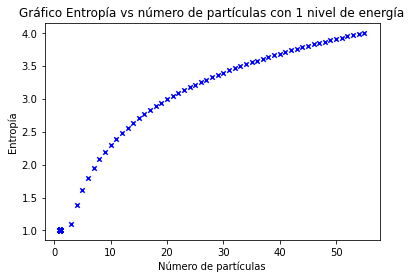

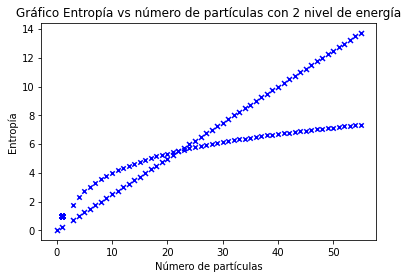

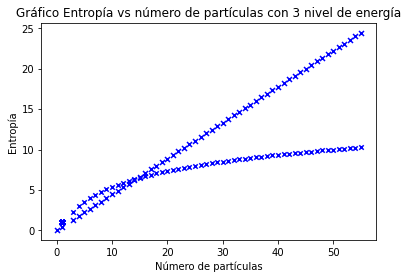

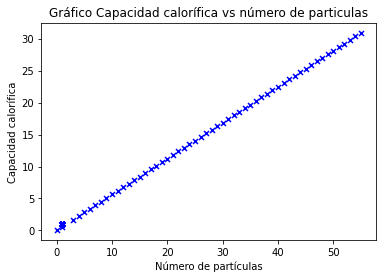

In [16]:
cesp=np.full((nnvl*10000),1,dtype=float)
entr=np.full((nnvl*10000),1,dtype=float)
conj=np.full((nnvl*10000),1,dtype=float)
# Se hace un ciclo para realizar los calculos
for i in range(nnvl):
    coni=i+1
    nivl_energ = np.full((coni + 1),1,dtype=float)
#Es necesario que comience con el segundo nivel energetico para que cumpla
    for j in range(npart):
        if j==1:
            conj[j]=0
        else:
            conj[j] = j+1
#Se hace la base de los niveles energeticos
        for k in range(coni + 1):
            if k==1:
                    nivl_energ[k]=0
            else:
                nivl_energ[k] = nivl_energ[k]+1
#Para el numero de estados posibles en el sistema
        if conj[j]-1<=0:
            est_tls = 0 #Estado totales
        else:
            est_tls = comb(int(conj[j] + coni - 1), int(conj[j] - 1))
        with open("Datos-Estados_de_Energia.txt", "a") as calc: #Se abre la base de datos como una funcion para escribir y almacena
#los datos mientras corre el programa
            calc.write("\nEn " + str(conj[j]) + " partículas y " + str(coni) + " niveles de energía se tiene:\n")
            calc.write(str(est_tls) + "\n estados totales de energia")
        #Calculo de capacidad calorifica teniendo un volumen constante en el sistema
        cesp[j] = conj[j] * kct_bt * (coni / (1 + coni))**2
        #Calculo de entropia en el sistema
        entr[j] = kct_bt * np.log(est_tls)
#Los graficos deben de ser realizados dentro del sistema para que se hagan mientras se compila durante cada ciclo del contador
#respectivo al numero de particulas y estados
    plt.scatter(conj,entr, label= "dots", color= "blue", marker= "x", s=20)
    plt.xlabel('Número de partículas')
    plt.ylabel('Entropía')
    plt.title('Gráfico Entropía vs número de partículas con '+str(coni)+' nivel de energía')
    plt.show()
    plt.scatter(conj,cesp, label= "dots", color= "blue", marker= "x", s=25)
    plt.xlabel('Número de partículas')
    plt.ylabel('Capacidad calorífica')
    plt.title('Gráfico Capacidad calorífica vs número de particulas')

## Graficas
Se realizan las graficas correspondientes a:
- Entropía vs Numero de nieveles del sistema 
- ...
- Entropia vs Numero de niveles del sistema que puso el usuario
- Capacidad calorifica vs numero de particulas que coloco el usuario
